# Reminders:

## Tuesday no lecture: work on the project 

## Thursday 10am-12pm : work on the project in class. 

## Thursday 12pm final due; will discuss solutions in class 12-12:50pm. 

## -------------

# Probabilities and Monte Carlo

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
from scipy.optimize import curve_fit

## Monte Carlo (MC): repeated random sampling from your code to get a numerical result ; got its name from the casino of Monte Carlo



### Traditional MC methods:
- numerical integrations of functions that can be graphed and don’t have simple analytic solution 
- simulations of random variables using random samples from a uniform distribution 
- estimation of uncertainties in the best-fit parameters of analytical models used to fit data 


### The basic idea is that if you do repeated random sampling you can make numerical estimations of unknown parameters, like, e.g. :
- you can use MC to calculate $\pi$ (see below)
- you can also use MC to do a numerical integration with random numbers (see below)
- you can calculate the error bars for your best-fit model of a dataset (see below)

### e.g., let's define the unit circle:


In [2]:
R = 1 


### draw a random 10,000,000 numbers for x and y in the range 0 to 1. Check if $x^2 + y^2 \lesssim R^2$. If so, add one to your counter

In [5]:
N = 10000000
c = 0

for i in range(0,N):
    x = np.random.random()
    y = np.random.random()
    r = x ** 2 + y ** 2
    if r<=1:
        c+=1

In [6]:
# what is c?
print( c )

7852904


In [7]:
# what is c/N?

print( c / N )

0.7852904


In [8]:
# what is 4* c/N?
print( 4 * c / N )

3.1411616


### what happened here? Would it work with N = 100 or 1000? 

In [9]:
N = 100
c = 0

for i in range(0,N):
    x = np.random.random()
    y = np.random.random()
    r = x ** 2 + y ** 2
    if r<=1:
        c+=1
        
print( 4 * c / N )

3.28


In [10]:
N = 1000
c = 0

for i in range(0,N):
    x = np.random.random()
    y = np.random.random()
    r = x ** 2 + y ** 2
    if r<=1:
        c+=1
        
print( 4 * c / N )

3.156


### the larger the number of random points we sample the closer we are to the real value of $\pi$

### We can also use MC for integration:

### let's integrate $f(x) = \int_0^1 e^x dx$

### by hand you expect: $e^1 - e^0 =$

In [11]:
print( np.exp(1)- np.exp(0) )

1.718281828459045


### I will use MC here; going for 5 different sample sizes in one go:

In [13]:
for N in 10**np.array( [1, 2, 4, 6, 8 ] ):  #-->you can try to push it to a larger array; 
                                            # my laptop crashes (lack of RAM) after ~10^8

    x = np.random.uniform( 0, 1, N )        #--> create an array of N random numbers between 0 and 1
    
    mean_val = np.mean( np.exp( x ) )         #--> get the mean value of the random  e^x
    
    print('%10d %.6f' % ( N, mean_val ) )

        10 1.629134
       100 1.736439
     10000 1.719656
   1000000 1.718725
 100000000 1.718217


### once again, the larger our random sample from which we draw is, the better our MC estimation for the integral

### you can also use MC to approximate the Gaussian distribution:

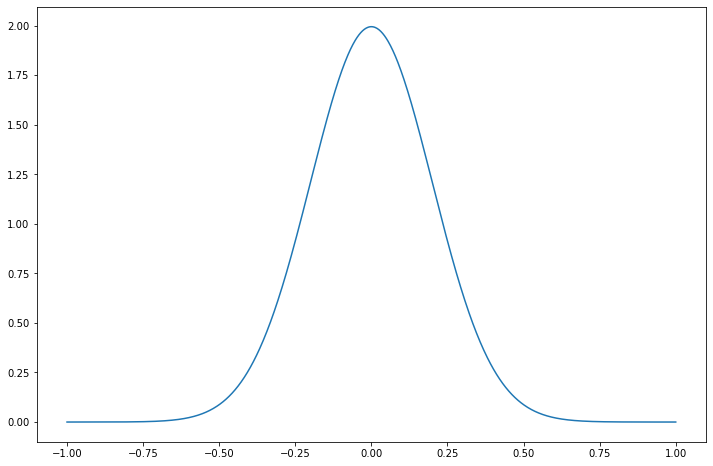

In [14]:
# first make a real Gaussian for comparison:

x = np.linspace(-1, 1, 1000 )

mu    = 0.0
sigma = 0.2


# 1/sqrt(2*pi*sigma**2) * exp(-(x-mu)**2/(2*sigma**2))

a1 = -( x - mu ) **2 / ( 2 * sigma **2 )
a2 = 1 / np.sqrt(2 * np.pi * sigma**2 )


plt.figure( figsize = (12 , 8) )
plt.plot( x, a2 * np.exp( a1 ) )

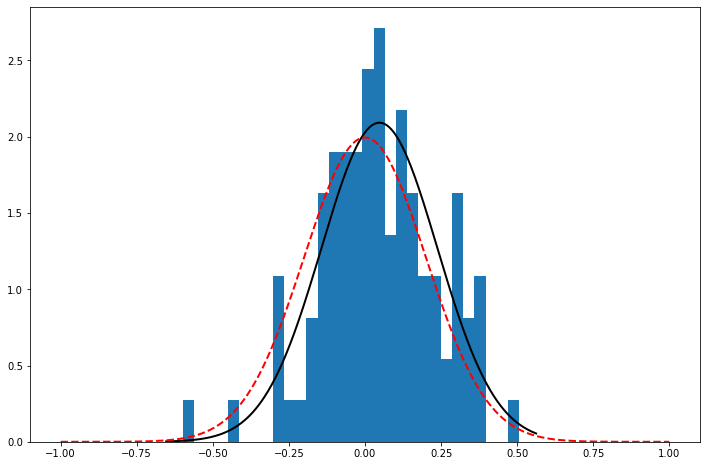

In [15]:
#let's try with MC:

data = np.random.normal(loc=mu, scale=sigma, size = 100) #--> experiment with small sample size; 
#the smaller (larger) it is  the further (close) you will be from (to) the real distrubution

mean,std=norm.fit(data)

plt.figure( figsize = ( 12, 8 ) )

plt.hist(data, bins=30,  density=True, stacked=True)

xmin, xmax = plt.xlim()

x2 = np.linspace(xmin, xmax, 400)
y = norm.pdf(x2, mean, std)
plt.plot(x2, y, color = 'black', linewidth = 2)
plt.plot(x, a2 * np.exp( a1 ),color = 'red',linestyle = '--', linewidth = 2)




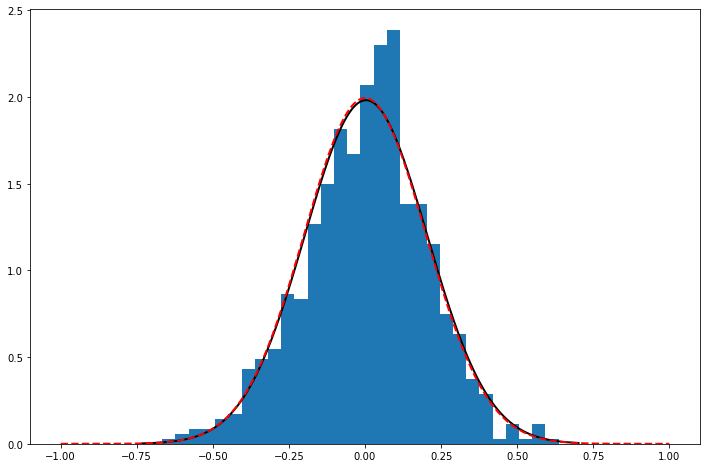

In [16]:
#let's try with MC:

data = np.random.normal(loc=mu, scale=sigma, size = 800) #--> experiment with small sample size; 
#the smaller (larger) it is  the further (close) you will be from (to) the real distrubution

mean,std=norm.fit(data)

plt.figure( figsize = ( 12, 8 ) )

plt.hist(data, bins=30, density=True, stacked=True)

xmin, xmax = plt.xlim()

x2 = np.linspace(xmin, xmax, 400)
y = norm.pdf(x2, mean, std)
plt.plot(x2, y, color = 'black', linewidth = 2)
plt.plot(x, a2 * np.exp( a1 ),color = 'red',linestyle = '--', linewidth = 2)




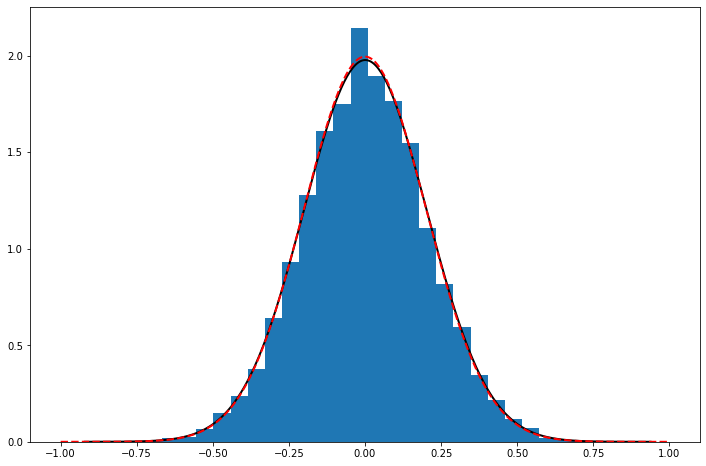

In [18]:
#let's try with MC:

data = np.random.normal(loc=mu, scale=sigma, size = 10000) #--> experiment with small sample size; 
#the smaller (larger) it is  the further (close) you will be from (to) the real distrubution

mean,std=norm.fit(data)

plt.figure( figsize = ( 12, 8 ) )

plt.hist(data, bins=30, density=True, stacked=True)

xmin, xmax = plt.xlim()

x2 = np.linspace(xmin, xmax, 400)
y = norm.pdf(x2, mean, std)
plt.plot(x2, y, color = 'black', linewidth = 2)
plt.plot(x, a2 * np.exp( a1 ),color = 'red',linestyle = '--', linewidth = 2)




### Now, assume we have some data we observed and we want to find our best-fit model like before, but also the uncertainty in our estimated best-fit parameters:
- generate N synthetic "observations" based on your real observations 
- find best-fit parameters for your synth observations
- find posterior distribution of your best-fit params ($a \pm da$ )

In [19]:
#dataset from our "fitting_data" class:
t = np.arange(1,22,2)
s = [ 11.80487185,  46.07654076 , 57.27329417 , 94.31029188, 146.48665845,
 185.33660777, 236.5500788,  318.94164082, 388.45874659, 475.7783416,
 555.86899163] 

In [20]:
def distance_with_acceleration_print(t, u, c, a):
    """Calculate the distance travelled with at a constant speed u for a known time
    and constant acceleration a."""
    
#    print ("speed=",u, "acceleration=",a, 'constant=',c)
    return c + u* t + 0.5 * a * t**2 

In [21]:
t2, v2 = curve_fit( distance_with_acceleration_print, t , s, 
                       absolute_sigma = True, sigma = np.zeros( len( t ) ) + 12 )


Text(0, 0.5, 'Distance')

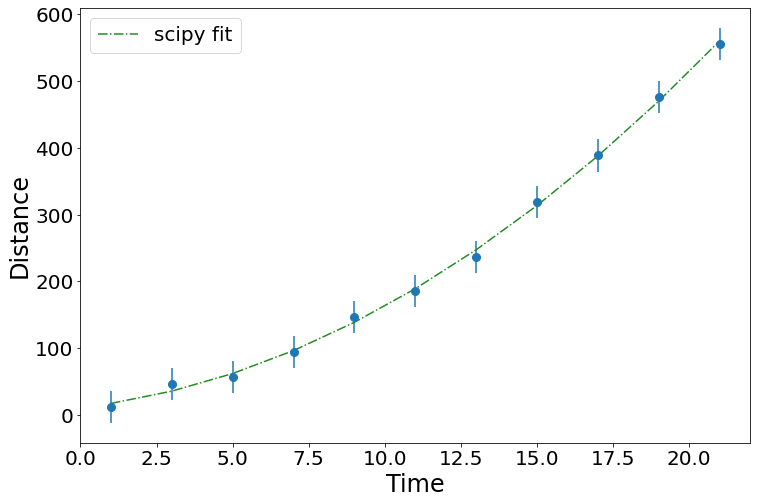

In [22]:
plt.figure( figsize = ( 12, 8 ) )

plt.errorbar( t, s, yerr = 24., linestyle = 'none', marker='o', markersize = 8 )

plt.plot( t, distance_with_acceleration_print( t, *t2), linestyle='-.', color='forestgreen',label ='scipy fit')

plt.xticks(fontsize =20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.xlabel('Time', fontsize = 24)
plt.ylabel('Distance', fontsize = 24)



In [24]:
print( t2 )

[ 5.22052118 10.93110039  1.99318001]


### good fit, but what are the uncertainties in our c, u and a?

In [25]:
N_trials = 10000
c_fits = np.array( [])

In [26]:
for q in range( N_trials ):
    x_test = np.random.uniform(1 , 22, len( t ))
    y = 11. + 5.2 * x_test + 0.5 * 2. * x_test**2 
    y_test = y + 0.3 * np.random.random( len (y ) ) 
    
    try:
        t3, v3 = curve_fit( distance_with_acceleration_print , 
                       x_test ,y_test ,absolute_sigma = True, sigma = np.zeros( len( t ) ) + 12) 
    #    print( [t1[0]] )
    except:
        continue
    
    if np.size( c_fits ) < 1:
        c_fits = np.copy( t3 )
    else:
        c_fits = np.vstack(( c_fits, t3 ))
#    u_fits = u_fits.extend( t1 [1] )
#    a_fits = a_fits.extend( t1 [2] )

In [27]:
c_fits.shape

(10000, 3)

In [28]:
print( np.mean( c_fits[ :, 0 ] ), np.std( c_fits[ :, 0 ] ) )
print( np.mean( c_fits[ :, 1 ] ), np.std( c_fits[ :, 1 ] ) )
print( np.mean( c_fits[ :, 2 ] ), np.std( c_fits[ :, 2 ] ) )

5.199989272314107 0.02577604456414913
11.150099262237218 0.13940686153836548
2.000000534017606 0.002187976579506431


(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

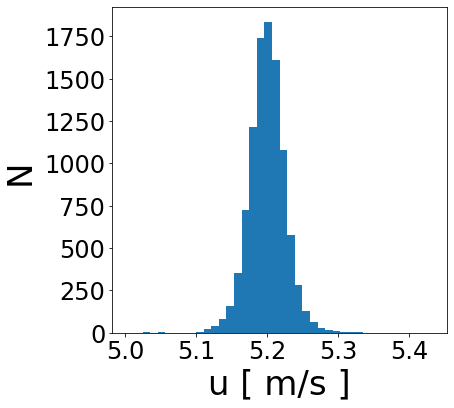

In [29]:
plt.figure( figsize = ( 6, 6 ) )
plt.hist( c_fits[ :, 0 ], bins = 40 )
plt.xlabel('u [ m/s ]', fontsize = 34 )
plt.ylabel('N ', fontsize = 34 )
plt.xticks( fontsize = 24 )
plt.yticks( fontsize = 24 )

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

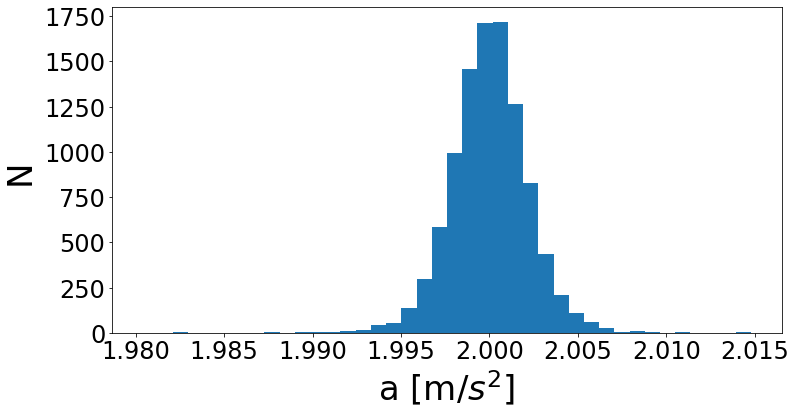

In [31]:
plt.figure( figsize = ( 12,6 ) )
plt.hist( c_fits[ :, 2 ], bins = 40 )
plt.xlabel('a [m/$s^2$]', fontsize = 34 )
plt.ylabel('N ', fontsize = 34 )
plt.xticks( fontsize = 24 )
plt.yticks( fontsize = 24 )

### Markov Chain Monte Carlo

#### A very brief overview of MCMC
- random walk/ change of a variable that you want to fit
- allow a parameter to vary in a 'random' way but every step depends *only* on the step before and the ones that came before that
- there is a probability that a given step can happen ; figure out which steps are visited not too often, which are happening all the time
- try multiple starting points; make sure you have enough steps in your chain to lose info of the start *and* be able to explore enough parameter space for each variable
- Bayesian priors & posterior distributions


<img src="../plots/mcmc_corner.png" width=350 height=150 />
source: https://emcee.readthedocs.io/en/stable/tutorials/line/

### if you want to delve into the topic UCF has courses you can follow (e.g., MAP6469 )

# ----------------------------

## Overview lecture

### A couple of highlights before we go in details:

- Python is an intuitive language: most commands are exactly what you would say (list--> list; print--> print(); interpolate --> interp; etc)
- Unlike other languages (e.g., C, FORTRAN) Python is interpreted (no compiler needed)
- Has no declarations 
- Does the memory management under the hood 
- Widely used in science and industry, so it has a lot of already developed routines for numerical and science problems
- It's free!
- Can easily interact with modules from other languages (C/Fortran)
- Can do network programming, encryption, databases, ML --> super useful in industry and science!
- Python has a wealth of functions to do what you want (numpy, scipy ....)


### Most of the things you want to do have probably already been done by someone. If you are stuck, don't try to reinvent the wheel: search python.org, numpy.org, scipy.org, matplolib.org, stackoverflow.com etc for a solution from someone else


### Import all the packages you need at the start of your code

In [29]:
import numpy as np
import matplotlib.pyplot as plt

### sometimes you might not need the whole package, but one function out of it:

In [30]:
from scipy.stats import chisquare

### or you might want to import functions from a .py file you stored them in:

In [168]:
from FtoC import FtoC
# from my_supoort_functions import function1, function2
# from hwN_support_funct import *

## A) Keeping a good work log is good practice. Also important for coding is to keep good comments in your code:

### compare this:

In [32]:
a = 5 * np.arange( 20 )
b = 0.5 * a + np.arange( 20 )**2. * 1e-2
c = 100.    + np.linspace( 1, 30, 100 )
d = np.interp( c, a, b )

### with this:

In [33]:
# get the x and y observations:
a = 5 * np.arange( 20 )
b = 0.5 * a + np.arange( 20 )**2. * 1e-2

# get the new x grid:
c = 100.    + np.linspace( 1, 30, 100 )

# interpolate y to the new x grid:
d = np.interp( c, a, b )

## B) Python has objects that are mutable: lists, numpy arrays, dictionaries  ; 
###                                               and immutable: tuples, strings. 

### B1) numpy arrays:

In [34]:
a = np.linspace( 2, 3, 10)

b = np.arange( 2, 3, 0.2)

c = np. zeros( 5 )

d = np.zeros ( ( 2, 3) ) # remember, if we need 2D+ we need an extra ()

In [35]:
print( a )

[2.         2.11111111 2.22222222 2.33333333 2.44444444 2.55555556
 2.66666667 2.77777778 2.88888889 3.        ]


In [36]:
print( b )

[2.  2.2 2.4 2.6 2.8]


In [37]:
print( c )

[0. 0. 0. 0. 0.]


In [38]:
print( d )

[[0. 0. 0.]
 [0. 0. 0.]]


### what does it means that they are mutable?

In [41]:
d[ :, 0 ] = 1
d[ :, 1 ] = 2
d[ :, 2 ] = 3
print( d )

[[1. 2. 3.]
 [1. 2. 3.]]


### B2) lists:

In [50]:
this_is_empty_list = []

In [51]:
this_is_another_list= [ 5 ]
print( id( this_is_another_list ) )

140266253322912


In [52]:
print( this_is_empty_list, this_is_another_list )

[] [5]


### now I want to start populating the empty list for locations i = 0 to 5 with i**2:

In [53]:
for i in range( 6 ):
    this_is_empty_list.append( i**2 )

In [54]:
print( this_is_empty_list )

[0, 1, 4, 9, 16, 25]


### and I want to add this list as two elements to end of the another_list  [ 6, 7 ] :

In [55]:
this_is_another_list.extend( [ 6,7 ] )

In [56]:
print( id( this_is_another_list ) )

140266253322912


### B3) dictionaries:

In [62]:
my_empty_dict = {}

In [63]:
my_other_dict = {'Mary': 2 }

In [64]:
print( id( my_empty_dict ) )
print( my_empty_dict )

my_empty_dict['test 1']  = 5.
my_empty_dict['test 2']  = 10.

print( my_empty_dict )
print( id( my_empty_dict ) )

140266260167728
{}
{'test 1': 5.0, 'test 2': 10.0}
140266260167728


In [65]:
my_other_dict[ 'George' ] = 7

print( my_other_dict )

{'Mary': 2, 'George': 7}


### What if I want to loop over the elements of the dictionary using their key words?

In [67]:
for key in my_other_dict:
    print( key, my_other_dict[ key ] )

Mary 2
George 7


In [69]:
for key, value in my_empty_dict.items():
    print( key, value )

test 1 5.0
test 2 10.0


In [71]:
print( my_empty_dict.values( ) )

dict_values([5.0, 10.0])


In [72]:
print( my_empty_dict.keys( ) )

dict_keys(['test 1', 'test 2'])


In [70]:
print( my_empty_dict.items( ) )

dict_items([('test 1', 5.0), ('test 2', 10.0)])


### What if I have a list of names, and I want to check if the corresponding value exists in my dictionary?

In [74]:
person = [ 'Mike', 'Mary', 'Peter' ]

for i in person:
    for key in my_other_dict:
        if key == i:
            print( key, my_other_dict[ key ] )

Mary 2


### B4) tuples:

In [79]:
my_empty_tuple = ()

In [80]:
my_tuple = ( 3, 2, 1 )

In [81]:
print( id( my_empty_tuple) )

my_empty_tuple = ( 5, )

print( id( my_empty_tuple ) )

140267808206928
140266266121936


In [82]:
print( my_empty_tuple )

(5,)


In [83]:
my_tuple[ 2 ] = -3 

TypeError: 'tuple' object does not support item assignment

### B5) strings:

In [75]:
my_string = 'my oh my'

In [76]:
print( my_string ) 
print( id( my_string ) )

my oh my
140266260630896


In [77]:
my_string = my_string + ', what a day!'

print( my_string ) 
print( id( my_string ) )

my oh my, what a day!
140266254643968


#### but, I can still slice it:

In [78]:
my_string[ : 5 ]

'my oh'

## C) Slicing

### Every time you want to access part of your array, list, tuple etc you are slicing your array,....

### Important to remember: 
- Python starts counting from 0!
- when slicing you START_AT : UP_TO_AND_NOT_INCLUDING: WITH_A_STEP_OF
- if you leave the START or UP_TO empty it is going from start, or to end of array/list/..

### 1D/ 2D/3D/ND cases:

 - 1D case

In [56]:
my_list = [ 1, 2, 3, 4, 10, 12, 14, 16 ]

In [57]:
# get elements 3, 4, 10 ; then get element 16:

print( my_list[ 2: 5 ]  )
print( my_list[ 7 ] )

[3, 4, 10]
16


In [58]:
# get elements starting from 2, with a step of 2:

print( my_list[ 1: : 2 ])

[2, 4, 12, 16]


 - 2D case

In [3]:
twodim_array = np.reshape( np.linspace( 1, 10, 24 ), (4,6) )

In [4]:
print( twodim_array )

[[ 1.          1.39130435  1.7826087   2.17391304  2.56521739  2.95652174]
 [ 3.34782609  3.73913043  4.13043478  4.52173913  4.91304348  5.30434783]
 [ 5.69565217  6.08695652  6.47826087  6.86956522  7.26086957  7.65217391]
 [ 8.04347826  8.43478261  8.82608696  9.2173913   9.60869565 10.        ]]


#### let's slice 2D the array

In [5]:
# get the data of the first line :

print( twodim_array[ 0, : ] )

[1.         1.39130435 1.7826087  2.17391304 2.56521739 2.95652174]


In [6]:
# get the data of the second column:

print( twodim_array[ :, 1 ] )

[1.39130435 3.73913043 6.08695652 8.43478261]


In [7]:
# get the data :
# 3.73913043  4.13043478  4.52173913
# 6.08695652  6.47826087  6.86956522

print( twodim_array[ 1:3, 1:4 ] )

[[3.73913043 4.13043478 4.52173913]
 [6.08695652 6.47826087 6.86956522]]


 - 3D case

In [69]:
threedim_array = np.reshape( np.linspace( 1, 10, 36 ), (3, 4, 3 ) )

In [70]:
threedim_array.shape

(3, 4, 3)

#### let's get all data for x = 0 ; what shape do you expect it to have?

In [71]:
cut1 = threedim_array[ 0, :, : ] 
print( cut1 )
print( cut1.shape )

[[1.         1.25714286 1.51428571]
 [1.77142857 2.02857143 2.28571429]
 [2.54285714 2.8        3.05714286]
 [3.31428571 3.57142857 3.82857143]]
(4, 3)


#### let's get all data for x = 1  ; y = 1 to 3 and z = 2 ; what shape do you expect it to have?

In [72]:
print( threedim_array[ 1, 1:3, 2 ] )

[5.37142857 6.14285714]


 - ND case (similar to all other cases...let's assume 5D)

In [73]:
ndim_array = np.reshape( np.linspace( 1, 1025, 1024 ), (4, 4, 4, 4, 4 ) )

#### our array has dimensions (x, y, z, u, v)
#### let's get element 1 from dimension x, element 3 from dimension z and all elements from y, u and v; what shape do you expect it to have?

In [75]:
slice1 = ndim_array[ 1, :, 3, :, : ]

In [77]:
print( slice1 )
print( slice1.shape )

[[[305.2971652  306.29814272 307.29912023 308.30009775]
  [309.30107527 310.30205279 311.3030303  312.30400782]
  [313.30498534 314.30596285 315.30694037 316.30791789]
  [317.30889541 318.30987292 319.31085044 320.31182796]]

 [[369.3597263  370.36070381 371.36168133 372.36265885]
  [373.36363636 374.36461388 375.3655914  376.36656891]
  [377.36754643 378.36852395 379.36950147 380.37047898]
  [381.3714565  382.37243402 383.37341153 384.37438905]]

 [[433.42228739 434.42326491 435.42424242 436.42521994]
  [437.42619746 438.42717498 439.42815249 440.42913001]
  [441.43010753 442.43108504 443.43206256 444.43304008]
  [445.4340176  446.43499511 447.43597263 448.43695015]]

 [[497.48484848 498.485826   499.48680352 500.48778104]
  [501.48875855 502.48973607 503.49071359 504.4916911 ]
  [505.49266862 506.49364614 507.49462366 508.49560117]
  [509.49657869 510.49755621 511.49853372 512.49951124]]]
(4, 4, 4)


#### finally, let's get element 2 from dimension x, elements 1 up to and including 3 from dimension y, elements 0 up to and including 1 from z and all elements from u and v; what shape do you expect it to have?

In [78]:
slice2 = ndim_array[ 2, 1:4, 0:2, :, : ]

In [79]:
print( slice2 )
print( slice2.shape )

[[[[577.56304985 578.56402737 579.56500489 580.5659824 ]
   [581.56695992 582.56793744 583.56891496 584.56989247]
   [585.57086999 586.57184751 587.57282502 588.57380254]
   [589.57478006 590.57575758 591.57673509 592.57771261]]

  [[593.57869013 594.57966764 595.58064516 596.58162268]
   [597.5826002  598.58357771 599.58455523 600.58553275]
   [601.58651026 602.58748778 603.5884653  604.58944282]
   [605.59042033 606.59139785 607.59237537 608.59335288]]]


 [[[641.62561095 642.62658847 643.62756598 644.6285435 ]
   [645.62952102 646.63049853 647.63147605 648.63245357]
   [649.63343109 650.6344086  651.63538612 652.63636364]
   [653.63734115 654.63831867 655.63929619 656.6402737 ]]

  [[657.64125122 658.64222874 659.64320626 660.64418377]
   [661.64516129 662.64613881 663.64711632 664.64809384]
   [665.64907136 666.65004888 667.65102639 668.65200391]
   [669.65298143 670.65395894 671.65493646 672.65591398]]]


 [[[705.68817204 706.68914956 707.69012708 708.69110459]
   [709.69208211 71

## D) For things that you want to do repeatedly you can create your own functions. You can store them in a .py file if you will use them more often. 

### Modules are packages of functions.

In [84]:
def my_function( a, b ):
    """Writting an informative docstring is super important. It will help you later on to 
    remember what your function is supposed to be doing. 
    Input: a, b parameters
    Output: parameter c """
    
    q = np.log( a ) + b
    
    return q

### the variable names you use in your main code can be different from the ones in the funct; just make sure that you keep the consistent in either block of code 

In [86]:
a1 = np.linspace( 4, 8, 20 )
a2 = a1 ** 2

s = my_function( a1, a2 )

print( s )

[17.38629436 19.16611951 21.03208419 22.98442138 25.02333298 27.14899508
 29.36156223 31.66117076 34.04794156 36.52198233 39.08338944 41.73224944
 44.46864037 47.29263284 50.20429092 53.20367297 56.29083225 59.46581753
 62.72867357 66.07944154]


### remember, if you forget what a function does you can get its docstring to figure it out:

In [87]:
print( my_function.__doc__ )

Writting an informative docstring is super important. It will help you later on to 
    remember what your function is supposed to be doing. 
    Input: a, b parameters
    Output: parameter c 


In [88]:
help( np.min )

Help on function amin in module numpy:

amin(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)
    Return the minimum of an array or minimum along an axis.
    
    Parameters
    ----------
    a : array_like
        Input data.
    axis : None or int or tuple of ints, optional
        Axis or axes along which to operate.  By default, flattened input is
        used.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, the minimum is selected over multiple axes,
        instead of a single axis or all the axes as before.
    out : ndarray, optional
        Alternative output array in which to place the result.  Must
        be of the same shape and buffer length as the expected output.
        See :ref:`ufuncs-output-type` for more details.
    
    keepdims : bool, optional
        If this is set to True, the axes which are reduced are left
        in the result as dimensions with size one. With this option,
        the result

## E) If, For and While statements are powerful for controlling the flow of data in your program. 

### For: for things that you want to do in a repetitive pattern (e.g., go through every element of list and multiply it by 2)

In [11]:
a = [ 2, 4, 5,  8, 11, 12, 14, 16, 21, 24 ]

for i in range( len( a ) ):
    a[ i ] = a[ i ] * 2
    
print( a )

[4, 8, 10, 16, 22, 24, 28, 32, 42, 48]


In [12]:
# you can scan directly the list with:
for i in a:
    print( i )


4
8
10
16
22
24
28
32
42
48


In [13]:
#but this will crash:
for i in a:
    print( a[ i ] )
#why?

22
42


IndexError: list index out of range

In [14]:
for i in range( len( a ) ):
    print( a[ i ] )

4
8
10
16
22
24
28
32
42
48


In [15]:
for i in a:
    if i % 2 == 0 :
        print( i, ' is even' )
    else: 
        print( i, ' is odd')
    

4  is even
8  is even
10  is even
16  is even
22  is even
24  is even
28  is even
32  is even
42  is even
48  is even


In [16]:
b = [ 2, 4, 5,  8, 11, 12, -4, 14, 16, 21, 24 ]

i = 0

while b[ i ] > 0 :
    print( b[ i ] )
    i+=1

2
4
5
8
11
12


### remember that numpy may not need FOR loops!

In [80]:
# get two numpy arrays and multiply them element by element:
n1 = np.arange( 1, 10, 2 )
n2 = np.arange( 20, 21, 2 )

#we don't need FOR, numpy is smart enough to do it for us!
n3 = n2 * n1

In [81]:
print( n3 )

[ 20  60 100 140 180]


### IF: for conditional things (e.g., only need to multiply elements of a list by 2  IF they are odd, and if they are even and NOT zero multiply by 3)

In [82]:
list1 = [ 0, 1, 2, 3, 4, 5, 6, 7, 8]

In [83]:
#it's a repetitive thing, so I start with a for:
for i in range( len( list1) ):
    #now comes the condition:
    if list1[ i ] % 2 == 1:
        list1[ i ] = list1[ i ] * 2
    #then I have another condition:
    elif (list1[ i ] % 2 == 0) & ( list1[ i ] != 0 ) :
        list1[ i ] = list1[ i ] * 3
    #if I have other elements they would go to the else; in this case it just stays as is :
    else:
        list1[ i ] = list1[ i ]


In [84]:
print( list1 )

[0, 2, 6, 6, 12, 10, 18, 14, 24]


## F) Bugs are an inevitability, but you can use some tricks to make your life easier:
- When creating your code make sure you test it often and with different test cases. Smaller batches are much easier to debug than larger ones.
- Once you see there is a bug, debug: print() variables or use Python's debugger: breakpoint()

### sometimes bugs will make your code seem to run as it should, but results don't make sense:

In [94]:
# e.g., we saw how a typo can be a bug:
def volume(radius):
    """Calculates the volume of a sphere of radius R  
    Input: R (m)
    Output: V (m$^3$)"""

    
    volumee = (4./3.) * np.pi * (radius**3)   #----typo!
    
    return(volume)

print( volume( 10 ) )

# or how an accidental omission can make the code appear to work, whike it doesnt:

num = int(input("Give me a number:"))

if num == 10 or 1:
    print('the number is 10 or 1')
else:
    print('the number is not 10 or 1')


<function volume at 0x7f9248b4f440>
Give me a number:10
the number is 10 or 1


### sometimes bugs will make your code crash:

In [95]:
def volume(radius):
    """Calculates the volume of a sphere of radius R  
    Input: R (m)
    Output: V (m$^3$)"""

    
    volume = (4./3.) * np.pi * (radius**3)   #----typo!
    
    print( 'the volume is, volume )
    
    return(volume)


SyntaxError: EOL while scanning string literal (729909075.py, line 9)

### often bugs can be associated with the indentation of your code:

In [99]:
# make code that scans array F and prints the last value at each step 
# and the mean of the array up to that point:

F = np.linspace( 1, 12, 20)
print( F )

[ 1.          1.57894737  2.15789474  2.73684211  3.31578947  3.89473684
  4.47368421  5.05263158  5.63157895  6.21052632  6.78947368  7.36842105
  7.94736842  8.52631579  9.10526316  9.68421053 10.26315789 10.84210526
 11.42105263 12.        ]


In [102]:
for i in range( len( F ) ):
    print( F[ i ] )
print( np.mean( F[ : i +1 ] ) )

1.0
1.5789473684210527
2.1578947368421053
2.736842105263158
3.3157894736842106
3.8947368421052633
4.473684210526316
5.052631578947368
5.631578947368421
6.210526315789474
6.7894736842105265
7.368421052631579
7.947368421052632
8.526315789473685
9.105263157894736
9.68421052631579
10.263157894736842
10.842105263157896
11.421052631578949
12.0
6.5


### F2) While we are at the topic, when you design a code you want to make sure than you make it such that it doesn't crash when someone else runs it. Not only making it bug-free, but also making sure that 'accidental bugs' in runtime can be diagnosed and treated.

- use 'try:', raise custome made exceptions and errors that will report an issue, but let the code run 
- use a log to record your warnings, errors and critical/ fatal bugs every time the code runs

In [97]:
names = [ 'emma.txt', 'first_data_read_plot.dat', 'Iamnothere.txt', 'distances_midterm.dat' ]

# scan all names
for nm in names:           
    
    # try to open the file:
    try:
        fin = open( '../all_data/'+ nm )
        print( ' Opened file ', nm )
        
    # if file is not there print an error message but do continue to next file:
    except:
        print( 'File', nm, 'not there' )

 Opened file  emma.txt
 Opened file  first_data_read_plot.dat
File Iamnothere.txt not there
 Opened file  distances_midterm.dat


## G) speaking of opening files: remember that I/O can be a bottleneck in your code; but you will need inevitably to read in data at some point

### G1) we have seen how to read text from a file in different ways:

In [104]:
f = open( '../all_data/emma.txt' , 'r')  # remember the letter you use is important!

emma_text = f.read()

f.close()


In [107]:
print( emma_text [ : 500] )

******The Project Gutenberg Etext of Emma, by Jane Austen******

Please take a look at the important information in this header.
We encourage you to keep this file on your own disk, keeping an
electronic path open for the next readers.  Do not remove this.


**Welcome To The World of Free Plain Vanilla Electronic Texts**

**Etexts Readable By Both Humans and By Computers, Since 1971**

*These Etexts Prepared By Hundreds of Volunteers and Donations*

Information on contacting Project Gutenberg to


In [117]:
with open( '../all_data/emma.txt') as f:
    print( f.readline() )
    print( f.readline() )
    print( f.readline() )
    print( f.readline() )

******The Project Gutenberg Etext of Emma, by Jane Austen******



Please take a look at the important information in this header.

We encourage you to keep this file on your own disk, keeping an



In [118]:
with open( '../all_data/emma.txt') as f:
    for q in range( 4 ):
        print( f.readline() )
    

******The Project Gutenberg Etext of Emma, by Jane Austen******



Please take a look at the important information in this header.

We encourage you to keep this file on your own disk, keeping an



In [116]:
m = 0

with open( '../all_data/emma.txt') as f:
    for line in f:
        print( line )
        m = m + 1
        
        if m == 4:
            break

******The Project Gutenberg Etext of Emma, by Jane Austen******



Please take a look at the important information in this header.

We encourage you to keep this file on your own disk, keeping an



### remember that break, pass etc can be useful for breaking loops or only doing things when you want:

In [129]:
m = 0 
with open( '../all_data/emma.txt') as f:
    for line in f:
        
        print( m % 2 )
        if m % 2 == 0:
            print( line )
        else:
            pass 
            
        m = m + 1
        if m >= 12:
            break

0
******The Project Gutenberg Etext of Emma, by Jane Austen******

1
0
Please take a look at the important information in this header.

1
0
electronic path open for the next readers.  Do not remove this.

1
0
Welcome To The World of Free Plain Vanilla Electronic Texts

1
0
Etexts Readable By Both Humans and By Computers, Since 1971**

1
0
These Etexts Prepared By Hundreds of Volunteers and Donations*

1


### G2) When you read (small) data numpy is your best friend (for big data look at csv, pandas etc) :

In [85]:
a = np.loadtxt( '../all_data/first_data_read_plot.dat' )

b = np.genfromtxt( '../all_data/first_data_read_plot.dat' )

## H) When you are interested in doing numerical or scientific computations you have numpy and scipy at your disposal. 

In [131]:
# slice the data array and assign each column to a named variable:
wav = a[ :, 0 ]
f1  = a[ :, 1 ]
f2  = a[ :, 2 ]

In [132]:
# you can now do all shorts of things to your data:
print( wav,  f1 )
print( 3 * f2[ 10 ] - 2 * f1[ 10 ] )

[1.1  1.11 1.11 1.11 1.12 1.12 1.13 1.13 1.14 1.14 1.14 1.15 1.15 1.16
 1.16 1.17 1.17 1.17 1.18 1.18 1.19 1.19 1.19 1.2  1.2  1.21 1.21 1.22
 1.22 1.22 1.23 1.23 1.24 1.24 1.25 1.25 1.26 1.26 1.26 1.27 1.27 1.28
 1.28 1.29 1.29 1.29 1.3  1.3  1.31 1.31 1.32 1.32 1.32 1.33 1.33 1.34
 1.34 1.35 1.35 1.35 1.36 1.36 1.37 1.37 1.38 1.38 1.38 1.39 1.39 1.4
 1.4  1.41 1.41 1.41 1.42 1.42 1.43 1.43 1.44 1.44 1.44 1.45 1.45 1.46
 1.46 1.47 1.47 1.47 1.48 1.48 1.49 1.49 1.49 1.5  1.5  1.51 1.51 1.52
 1.52 1.52 1.53 1.53 1.54 1.54 1.54 1.55 1.55 1.56 1.56 1.56 1.57 1.57
 1.58 1.58 1.59 1.59 1.59 1.6  1.6  1.61 1.61 1.61 1.62 1.62 1.63 1.63
 1.63 1.64 1.64 1.65 1.65 1.65 1.66 1.66 1.66 1.67 1.67 1.68 1.68 1.68
 1.69 1.69 1.7  1.7 ] [0.72 0.73 0.69 0.68 0.66 0.69 0.66 0.63 0.63 0.63 0.65 0.69 0.69 0.67
 0.66 0.66 0.65 0.64 0.67 0.74 0.78 0.8  0.81 0.82 0.83 0.87 0.9  0.93
 0.94 0.98 0.98 0.97 0.97 0.99 0.96 1.   1.04 1.09 1.08 1.09 1.07 1.08
 1.04 1.08 1.06 1.08 1.07 1.07 1.06 1.06 1.04 1.02 0.93 

In [133]:
b = np.array( [ [ 2, 3 ], [ 5, 4 ] ])

c = np.linspace(1, 16, 6).reshape((3, 2))

In [134]:
print( b )

print( c )

[[2 3]
 [5 4]]
[[ 1.  4.]
 [ 7. 10.]
 [13. 16.]]


In [ ]:
## you can even fit models to data:

In [135]:
# you have observations:

x = np.linspace( 1, 16, 6 )
y = 5 * x  + 2.1


#what is the best fit model a * x + b ?


from scipy.optimize import curve_fit



In [136]:
def myfunct( x, a, b ):
    """fits your function"""
    
    return a * x + b

s1, v1 = curve_fit( myfunct, x, y, absolute_sigma = True, sigma = np.zeros( len( x ) ) + 2 )
print( s1 )

[5.  2.1]


In [137]:
# or if you want to do it manually:

a1 = np.arange( 1, 10, 0.5 )
a2 = np.arange( 1, 3, .1 )

chs = np.zeros( ( len( a1 ), len( a2 ) ) )

for i in range( len( a1 ) ):
    for j in range( len( a2 ) ):
        ym = a1[ i ] * x + a2[ j ]
        chs[ i, j ] = np.sum( ( ym - y ) ** 2. / ym**2 )


mn = np.where( chs == np.min( chs ) )

print( a1[ mn[ 0 ] ], a2[ mn[ 1 ] ] )


[5.] [2.1]


## I) Good plots are important to show your results and convey your mesage to your audience

### For most plots the basic plt will work just fine.

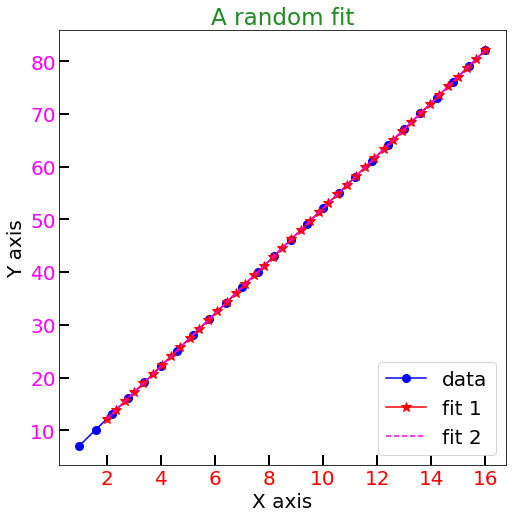

In [156]:
# you have observations 
x = np.linspace( 1, 16, 26 )
y = 5 * x  + 2.1

# you now have another observation at different x points
x2 = np.linspace( 2, 16, 42 )
y2 = 5 * x2  + 2.1

# and you want to test if they are coming from the same distribution

#first interpolate y from the x to the x2 grid so that we compare apples to apples:
yb = np.interp( x2, x, y)


#then plot to compare:

plt.figure( figsize = ( 8, 8 ) )
plt.plot( x, y , color = 'blue' , marker = 'o', markersize = 8 , label = 'data')
plt.plot( x2, y2, color = 'red' , marker = '*', markersize = 10, label = 'fit 1' )

plt.plot( x2, yb, color = 'magenta', linestyle = '--', label = 'fit 2')

plt.xlabel( 'X axis', fontsize = 20 )
plt.ylabel( 'Y axis', fontsize = 20 )
plt.legend( fontsize = 20 , loc = 'lower right' )

plt.xticks( fontsize = 20 , color = 'red'     )
plt.yticks( fontsize = 20 , color = 'magenta' )
plt.title( 'A random fit', fontsize = 23, color = 'forestgreen' )

plt.tick_params( which = 'both', direction = 'in' , width = 2, length = 10 )

### If you want more complex plots (side by side, one on top of another, double x or y axis etc) you need to use the advanced plotting method with ax

Text(0, 0.5, '$\\sqrt{X}$ ')

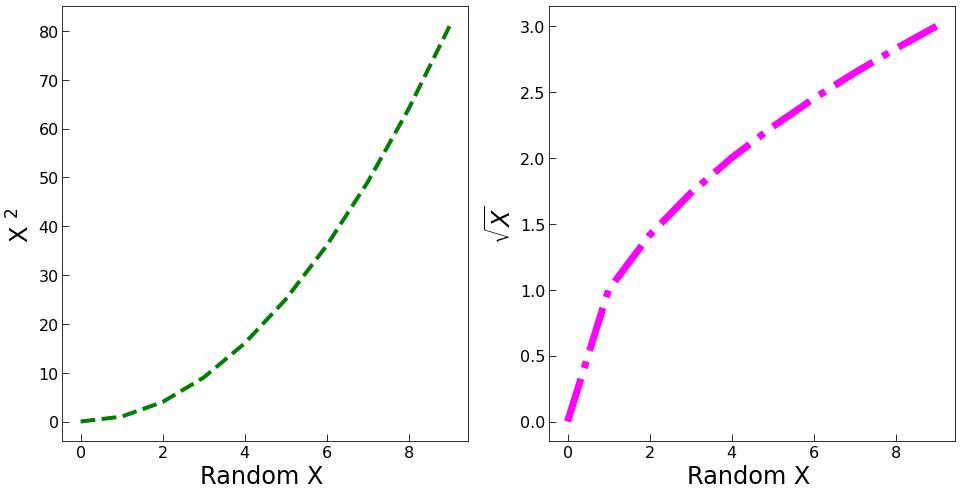

In [88]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2 , figsize = (16, 8 ) )

ax1.plot( np.arange( 10 ) , np.arange( 10 )**2, color = 'green', linestyle = '--' , linewidth = 4 )
ax1.tick_params( axis ='both', which ='both', length = 7 , direction = 'in' , labelsize = 16 )
ax1.set_xlabel( 'Random X ' , fontsize = 24 )
ax1.set_ylabel( 'X $^2$ ' , fontsize = 24 )

ax2.plot( np.arange( 10 ) , np.arange( 10 )**0.5, color = 'magenta', linestyle = '-.' , linewidth = 7 )
ax2.tick_params( axis ='both', which ='both', length = 7 , direction = 'in' , labelsize = 16 )
ax2.set_xlabel( 'Random X ' , fontsize = 24 )
ax2.set_ylabel( '$\\sqrt{X}$ ' , fontsize = 24 )


### You can also use interactive plotting with %matplotlib

In [22]:
%matplotlib

Using matplotlib backend: MacOSX


In [89]:
from mpl_toolkits.mplot3d import Axes3D 

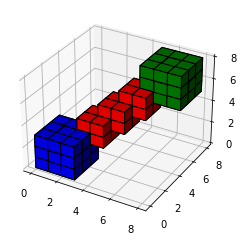

In [90]:
#from https://matplotlib.org/stable/gallery/mplot3d/voxels.html

# prepare some coordinates
x, y, z = np.indices((8, 8, 8))

# draw cuboids in the top left and bottom right corners, and a link between
# them
cube1 = (x < 3) & (y < 3) & (z < 3)
cube2 = (x >= 5) & (y >= 5) & (z >= 5)
link = abs(x - y) + abs(y - z) + abs(z - x) <= 2

# combine the objects into a single boolean array
voxelarray = cube1 | cube2 | link

# set the colors of each object
colors = np.empty(voxelarray.shape, dtype=object)
colors[link] = 'red'
colors[cube1] = 'blue'
colors[cube2] = 'green'

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxelarray, facecolors=colors, edgecolor='k')

plt.show()

/Users/theodora_karalidi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


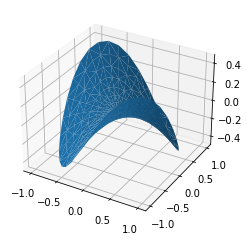

In [91]:
'''
======================
Triangular 3D surfaces
======================

Plot a 3D surface with a triangular mesh.
From https://matplotlib.org/2.0.2/mpl_examples/mplot3d/trisurf3d_demo.py
'''


n_radii = 8
n_angles = 36

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius.
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Compute z to make the pringle surface.
z = np.sin(-x*y)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)


In [53]:
dat = np.loadtxt( 'a_scatter_plot.dat' )
x = dat[:, 0]
y = dat[:, 1]
z = dat[:, 2]

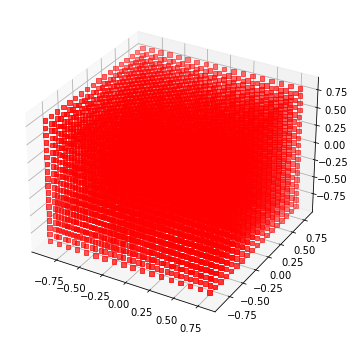

In [55]:
fig = plt.figure( figsize=(6,6) )
ax = plt.subplot(111, projection='3d')


ax.scatter(x,y,z , c='r', marker='s')  





### Remember to turn back to non-interactive mode with:

In [25]:
%matplotlib inline

### Sometimes you will have data that you want to contour plot (2D + 1D in color). 

In [19]:
data = np.loadtxt('../all_data/whatsinthefile.dat')
data = np.flip( data, 0)

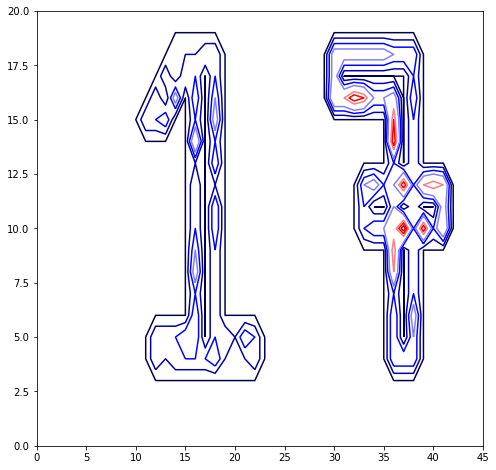

In [21]:
plt.figure( figsize = (8,8) )
plt.contour( data ,cmap = 'seismic')


## J) Last, but not least, you will often need to fit data with models. Python offers premade functions to do this such as curvefit, leastsq, polyfit (for polynomials). You can also do a brute-force parametric scan.

In [32]:
#x = np.linspace( 0.1, 124, 85)
#y = 5* x**2 + 1.2 *x 

In [34]:
x = np.array([1.00000e-01, 1.57500e+00, 3.05000e+00, 4.52500e+00, 6.00000e+00,
       7.47500e+00, 8.95000e+00, 1.04250e+01, 1.19000e+01, 1.33750e+01,
       1.48500e+01, 1.63250e+01, 1.78000e+01, 1.92750e+01, 2.07500e+01,
       2.22250e+01, 2.37000e+01, 2.51750e+01, 2.66500e+01, 2.81250e+01,
       2.96000e+01, 3.10750e+01, 3.25500e+01, 3.40250e+01, 3.55000e+01,
       3.69750e+01, 3.84500e+01, 3.99250e+01, 4.14000e+01, 4.28750e+01,
       4.43500e+01, 4.58250e+01, 4.73000e+01, 4.87750e+01, 5.02500e+01,
       5.17250e+01, 5.32000e+01, 5.46750e+01, 5.61500e+01, 5.76250e+01,
       5.91000e+01, 6.05750e+01, 6.20500e+01, 6.35250e+01, 6.50000e+01,
       6.64750e+01, 6.79500e+01, 6.94250e+01, 7.09000e+01, 7.23750e+01,
       7.38500e+01, 7.53250e+01, 7.68000e+01, 7.82750e+01, 7.97500e+01,
       8.12250e+01, 8.27000e+01, 8.41750e+01, 8.56500e+01, 8.71250e+01,
       8.86000e+01, 9.00750e+01, 9.15500e+01, 9.30250e+01, 9.45000e+01,
       9.59750e+01, 9.74500e+01, 9.89250e+01, 1.00400e+02, 1.01875e+02,
       1.03350e+02, 1.04825e+02, 1.06300e+02, 1.07775e+02, 1.09250e+02,
       1.10725e+02, 1.12200e+02, 1.13675e+02, 1.15150e+02, 1.16625e+02,
       1.18100e+02, 1.19575e+02, 1.21050e+02, 1.22525e+02, 1.24000e+02])
y = np.array([1.70000000e-01, 1.42931250e+01, 5.01725000e+01, 1.07808125e+02,
       1.87200000e+02, 2.88348125e+02, 4.11252500e+02, 5.55913125e+02,
       7.22330000e+02, 9.10503125e+02, 1.12043250e+03, 1.35211812e+03,
       1.60556000e+03, 1.88075812e+03, 2.17771250e+03, 2.49642313e+03,
       2.83689000e+03, 3.19911312e+03, 3.58309250e+03, 3.98882812e+03,
       4.41632000e+03, 4.86556812e+03, 5.33657250e+03, 5.82933312e+03,
       6.34385000e+03, 6.88012313e+03, 7.43815250e+03, 8.01793812e+03,
       8.61948000e+03, 9.24277813e+03, 9.88783250e+03, 1.05546431e+04,
       1.12432100e+04, 1.19535331e+04, 1.26856125e+04, 1.34394481e+04,
       1.42150400e+04, 1.50123881e+04, 1.58314925e+04, 1.66723531e+04,
       1.75349700e+04, 1.84193431e+04, 1.93254725e+04, 2.02533581e+04,
       2.12030000e+04, 2.21743981e+04, 2.31675525e+04, 2.41824631e+04,
       2.52191300e+04, 2.62775531e+04, 2.73577325e+04, 2.84596681e+04,
       2.95833600e+04, 3.07288081e+04, 3.18960125e+04, 3.30849731e+04,
       3.42956900e+04, 3.55281631e+04, 3.67823925e+04, 3.80583781e+04,
       3.93561200e+04, 4.06756181e+04, 4.20168725e+04, 4.33798831e+04,
       4.47646500e+04, 4.61711731e+04, 4.75994525e+04, 4.90494881e+04,
       5.05212800e+04, 5.20148281e+04, 5.35301325e+04, 5.50671931e+04,
       5.66260100e+04, 5.82065831e+04, 5.98089125e+04, 6.14329981e+04,
       6.30788400e+04, 6.47464381e+04, 6.64357925e+04, 6.81469031e+04,
       6.98797700e+04, 7.16343931e+04, 7.34107725e+04, 7.52089081e+04,
       7.70288000e+04])

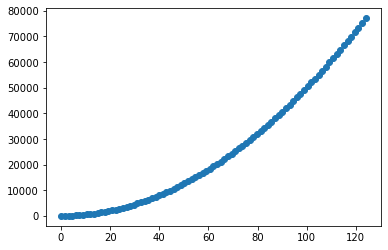

In [35]:
plt.plot( x,y, marker = 'o', linestyle ='none')

### We know that the underlying model is of the form: $a * x**2 + b *x +c $   
### Let's do a brute-force fit limiting $a\in [ 1, 6)$  with a step of 0.5, $b\in[1, 4)$ with a step of 0.1 and $c\in[0, 1.5) $ with a step of 0.1:

<img src="chi_sq_min.png" width=300 height=200 />

In [47]:
a = np.arange( 1, 6, 0.5 )
b = np.arange( 1, 4 , 0.1 )
c = np.arange( 0., 1.5, 0.1 )

r2 = np.zeros( (len( a ), len( b ), len( c ) ) )


for i in range( len(a ) ):
    for j in range( len( b ) ):
        for k in range( len( c ) ):
            model = a[ i ] * x**2 + b[ j ]* x + c[ k ]
            r2[ i, j, k ] = np.sum( (y-model)**2/model )   
            #or if I had errors I could do chisq: np.sum( (y-model)**2/sigma**2 )



In [48]:
print( np.min( r2 ))
min_loc = np.where( r2 == np.min( r2 ) )
print( min_loc )

6.858867241561913e-13
(array([8]), array([2]), array([0]))


In [49]:
print( 'The best model is: ', a[ min_loc[ 0 ] ] , '*x$^2$ +', b[ min_loc[1] ] , '*x + ', c[ min_loc[2]] , '.')

The best model is:  [5.] *x$^2$ + [1.2] *x +  [0.] .


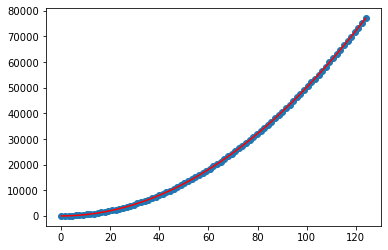

In [50]:
plt.plot( x,y, marker = 'o', linestyle ='none')
plt.plot( x, a[ min_loc[ 0 ] ]* x**2 + b[ min_loc[ 1 ] ] *x  + c[ min_loc[ 1 ] ] , color = 'red')

### or using curvefit:

In [51]:
def fit_my_curve( x, a, b, c ):
    
    print( 'a=', a, 'b=', b, 'c=', c)
    
    return a*x**2 + b *x + c

In [52]:
x1, x2 = curve_fit( fit_my_curve, x, y, sigma = np.ones( len( x )) * 10 )

a= 1.0 b= 1.0 c= 1.0
a= 1.0 b= 1.0 c= 1.0
a= 1.0 b= 1.0 c= 1.0
a= 1.0000000149011612 b= 1.0 c= 1.0
a= 1.0 b= 1.0000000149011612 c= 1.0
a= 1.0 b= 1.0 c= 1.0000000149011612
a= 5.000000055948894 b= 1.1999942126499539 c= 5.271888042013284e-05
a= 5.000000130454701 b= 1.1999942126499539 c= 5.271888042013284e-05
a= 5.000000055948894 b= 1.199994230531261 c= 5.271888042013284e-05
a= 5.000000055948894 b= 1.1999942126499539 c= 5.2718881205705376e-05
a= 5.000000007985708 b= 1.1999985247494311 c= 2.774259422339112e-05
a= 5.000000082491514 b= 1.1999985247494311 c= 2.774259422339112e-05
a= 5.000000007985708 b= 1.1999985426308026 c= 2.774259422339112e-05
a= 5.000000007985708 b= 1.1999985247494311 c= 2.774259463678799e-05
a= 5.00000000590947 b= 1.1999989933492217 c= 2.603462115602091e-05


## Practice makes perfect! 

- familiarize yourself with more than one language, but especially Python if you want to work on ML
- familiarize with statistical techniques (especially if interested in ML/data science)
- familiarize with data visualization techniques 


- get comfortable with presenting your work (see also the 3/1 lecture for Overleaf/Latex intro; 
   https://www.overleaf.com/read/kbgmssxspcvw will be active forever)
- think of ways/projects that show you are 
    - good with collaborations
    - good with learning new things


- work on some projects ( research/ internships and join competitions) 
- create a portofolio of projects  





https://www.kaggle.com/

UCF Data Analytics and Visualization Boot Camp (https://bootcamp.ce.ucf.edu/data/online/landing/?s=Google-Unbranded&dki=Become%20a%20Data%20Scientist&msg_cv_scta=4&msg_cv_stbn=1&msg_cv_fcta=1&pkw=how%20to%20data%20scientist&pcrid=458645039223&pmt=e&utm_source=google&utm_medium=cpc&utm_campaign=GGL%7CUCF%7CSEM%7CDATA%7C-%7CONL%7CTIER-1%7CALL%7CNBD-G%7CEXACT%7CCore%7CExploratory&utm_term=how%20to%20data%20scientist&s=google&k=how%20to%20data%20scientist&utm_adgroupid=110879426601&utm_locationphysicalms=9011804&utm_matchtype=e&utm_network=g&utm_device=c&utm_content=458645039223&utm_placement=&gclid=Cj0KCQjw1PSDBhDbARIsAPeTqrdDObxPmycETFrUDHdrwYchO0fBEpnyCZ9TnjJ5dImRYpzomF1nOwYaAuwuEALw_wcB&gclsrc=aw.ds)